Pneumonia X-Ray Data Classification

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn.metrics import confusion_matrix, f1_score

from keras.models import Model
from keras.layers import Conv2D, SeparableConv2D
from keras.layers import Input, Flatten
from keras.layers import BatchNormalization, MaxPooling2D
from keras.layers import Dense, Dropout
from keras.preprocessing.image import load_img, array_to_img

In [2]:
EPOCH = 200
BATCH_SIZE = 100
RES = 180
SHAPE = (RES, RES, 3)

DATA_MODE = 0
TRAIN_MODE = 1
PATH = '/content/drive/MyDrive/IDEC/chest-1200'

In [3]:
# Data Processing
# T_tot = train total / Train Image Number
# V_tot = validatoin total / Test Image Number
# N_tot = normal total / Normal Image Number
# P_tot = pneumonia total / Pneumonia Image Number
# N_path = normal image path / Normal Image Path
# P_path = pneumonia image path / Pneumonia Image Path

T_tot = V_tot = N_tot = P_tot = 0
N_path = P_path = []

X_train = np.zeros((0))
Y_train = np.zeros((0))
X_test = np.zeros((0))
Y_test = np.zeros((0))

In [4]:
# Path Processing
def train_path():
    global T_tot, N_tot, P_tot, N_path, P_path
    N_path = []
    P_path = []

    # Normal Data
    dir = os.path.join(PATH, 'train/NORMAL')
    print(dir)

    for f in sorted(os.listdir(dir)):
        N_path.append(os.path.join(dir,f))
    print("Train Normal Data Number :", len(N_path))
    N_tot = len(N_path)

    # Pneumonia Data
    dir = os.path.join(PATH, 'train/PNEUMONIA')
    print(dir)

    for f in sorted(os.listdir(dir)):
        P_path.append(os.path.join(dir,f))
    print("Train Pneumonia Data Number :", len(P_path))
    P_tot = len(P_path)

    # Total Train Image Number
    T_tot = N_tot + P_tot
    print("Total Train Image Number :", T_tot)


In [5]:
# Train Image Scaling
def train_resize():
    global T_tot, N_tot, P_tot, N_path, P_path
    global X_train, Y_train

    print("\nTrain Normal Data Processing")
    begin = time()

    # Train Input Data = 4D, Train Output Data = 1D
    X_train = np.zeros((T_tot, RES, RES, 3))
    Y_train = np.zeros((T_tot, ))

    # 0 = Normal, 1 = Pneumonia
    for i, path in enumerate(N_path): 
        img = load_img(path, target_size=(RES, RES))
        X_train[i] = img
        Y_train[i] = 0
        #print(i)

    end = time()
    print("Train Normal Image Processing TIme :{:.2f}".format(end-begin))

    print("\nTrain Pneumonia Data Processing")
    begin = time()

    for i, path in enumerate(P_path): 
        img = load_img(path, target_size=(RES, RES))
        X_train[N_tot+i] = img
        Y_train[N_tot+i] = 1

    end = time()
    print("Train Pneumonia Image Processing TIme :{:.2f}".format(end-begin))

    X_train = X_train / 255.0


In [6]:
# Test Image Processing
def test_path():
    global V_tot, N_tot, P_tot, N_path, P_path
    N_path = []
    P_path = []

    # Normal Data
    dir = os.path.join(PATH, 'test/NORMAL')
    print(dir)

    for f in sorted(os.listdir(dir)):
        N_path.append(os.path.join(dir,f))
    print("Test Normal Data Number :", len(N_path))
    N_tot = len(N_path)

    # Pneumonia Data
    dir = os.path.join(PATH, 'test/PNEUMONIA')
    print(dir)

    for f in sorted(os.listdir(dir)):
        P_path.append(os.path.join(dir,f))
    print("Test Pneumonia Data Number :", len(P_path))
    P_tot = len(P_path)

    # Total Test Image Number
    V_tot = N_tot + P_tot
    print("Total Test Image Number :", V_tot)


In [7]:
# Test Image Scaling
def test_resize():
    global V_tot, N_tot, P_tot, N_path, P_path
    global X_test, Y_test

    print("\nTest Normal Data Processing")
    begin = time()

    # Test Input Data = 4D, Test Output Data = 1D
    X_test = np.zeros((V_tot, RES, RES, 3))
    Y_test = np.zeros((V_tot, ))

    # 0 = Normal, 1 = Pneumonia
    for i, path in enumerate(N_path): 
        img = load_img(path, target_size=(RES, RES))
        X_test[i] = img
        Y_test[i] = 0
        #print(i)

    end = time()
    print("Test Normal Image Processing TIme :{:.2f}".format(end-begin))

    print("\nTest Pneumonia Data Processing")
    begin = time()

    for i, path in enumerate(P_path): 
        img = load_img(path, target_size=(RES, RES))
        X_test[N_tot+i] = img
        Y_test[N_tot+i] = 1

    end = time()
    print("Train Pneumonia Image Processing TIme :{:.2f}".format(end-begin))

    X_test = X_test / 255.0

In [8]:
# Make Numpy File
def save_numpy():
    with open('chest-array.npy','wb') as f:
        np.save(f, X_train)
        np.save(f, Y_train)
        np.save(f, X_test)
        np.save(f, Y_test)

    print("Save Numpy Data")

In [9]:
# Read Numpy File
def load_numpy():
    global X_train
    global Y_train
    global X_test 
    global Y_test  

    with open('/content/drive/MyDrive/IDEC/chest-array.npy','rb') as f:
        X_train = np.load(f)
        Y_train = np.load(f)
        X_test = np.load(f)
        Y_test = np.load(f)

    print("Read Numpy Data")

In [10]:
if DATA_MODE:
    train_path()
    train_resize()
    test_path()
    test_resize()
    save_numpy()
else:
    load_numpy()

Read Numpy Data


[686, 795, 131, 29, 167, 522, 92, 342, 513, 62, 900, 611, 660, 473, 683, 551]


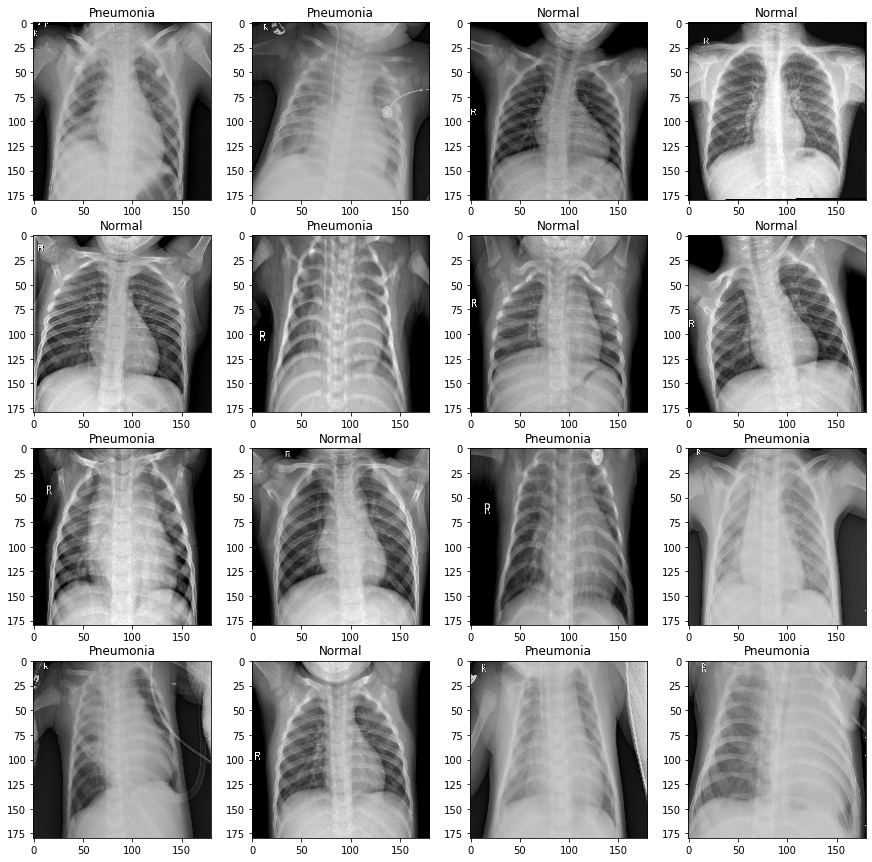

In [14]:
# Train Data Sample

total = len(X_train)
pick = random.sample(range(0,total),16)
print(pick)

fig, spot = plt.subplots(4,4,figsize=(15,15))
cnt = 0

for i in range(4):
    for j in range(4):
        spot[i, j].imshow(X_train[pick[cnt]])
        
        label = Y_train[pick[cnt]]
        if label:
            spot[i, j].title.set_text('Pneumonia')
        else:
            spot[i, j].title.set_text('Normal')

        cnt += 1

#plt.savefig('sample.png)

In [12]:
print("Train Input Data", X_train.shape)
print("Train Output Data", Y_train.shape)
print("Test Input Data", X_test.shape)
print("Test Output Data", Y_test.shape)

Train Input Data (1000, 180, 180, 3)
Train Output Data (1000,)
Test Input Data (200, 180, 180, 3)
Test Output Data (200,)
